# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></div><div class="lev1 toc-item"><a href="#Algorithms" data-toc-modified-id="Algorithms-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Algorithms</a></div><div class="lev2 toc-item"><a href="#Insert-Sort" data-toc-modified-id="Insert-Sort-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Insert Sort</a></div><div class="lev2 toc-item"><a href="#Select-Sort" data-toc-modified-id="Select-Sort-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Select Sort</a></div><div class="lev2 toc-item"><a href="#Merge-Sort" data-toc-modified-id="Merge-Sort-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Merge Sort</a></div><div class="lev2 toc-item"><a href="#Count-Sort" data-toc-modified-id="Count-Sort-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Count Sort</a></div><div class="lev2 toc-item"><a href="#Radix-Sort" data-toc-modified-id="Radix-Sort-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Radix Sort</a></div><div class="lev2 toc-item"><a href="#Runtime-Comparison" data-toc-modified-id="Runtime-Comparison-26"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Runtime Comparison</a></div><div class="lev1 toc-item"><a href="#Implementation-Tips" data-toc-modified-id="Implementation-Tips-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Implementation Tips</a></div><div class="lev1 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></div><div class="lev1 toc-item"><a href="#Bonus-Material" data-toc-modified-id="Bonus-Material-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Bonus Material</a></div><div class="lev2 toc-item"><a href="#Asymptotic-Runtime" data-toc-modified-id="Asymptotic-Runtime-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Asymptotic Runtime</a></div>

In [122]:
from __future__ import print_function, division
from random import randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# the class might not have numpy, though that would be easier;
# I wanted them to be able to use this function
def rand_list(n_items=50, lower_bound=-100, upper_bound = 100):
    """
    :param n_items: number of elements in the list
    :param lower_bound: smallest integer allowed
    :param upper_bound: largest integer allowed
    :returns: a list of length n_items containing integers bounded by lower_bound and upper_bound
    (both bounds are inclusive)
    """
    return [randint(lower_bound, upper_bound) for _ in xrange(n_items)]

# Overview

This notebook provides a lesson plan for my 2017 Spark class: **Intro to Sorting (w/ Python)**.

[Visualizations][vis].

**Intro**

* I'm Nathan; studying CS and bio; found my love for computer science later than I would have liked. I hope by teaching this, I can help them see the beauty of CS at a younger age and find a way to apply it in whatever they do
* Rachel =) here as a TA to help with the coding portion
* Anybody is welcome to leave the class anytime if it's not a good fit for them; there are walk-in activities they can go to

**Motivation**
* What is sorting?
    * Putting some collection of elements in order, for some comparison function.
    * We'll sort numbers today, because that's the most intuitive; other things can be sorted too
* Why should we care?
    * We probably take it for granted that we can sort anything we want to, but this comes up everywhere
    * What if you want to view the most popular movies released in the last month? You'll have to sort the list by popularity!
    * Do you have a to-do list on your phone? It probably sorts your tasks by due date! You don't want to turn an assignment in late because your list wasn't properly sorted
    * I build models to predict whether patients will die in intensive care units. For a doctor, it might be nice to sort their patients by predicted probability of death so they can give extra care to those patients who need it most!
    * You can also find things much more quickly if they're sorted in order!
        * How would you like to find a contact in your phone if they were sorted in random order?

**Warm-up**

How do you sort?
* Pass out one suite of cards to each group of two students (should have one group of three)
* Have the students shuffle the cards and then sort them
* Each student should sort them once; the other should watch and note how they do it
* Don't try to be fancy; just do what comes naturally
* Ask a couple of students: how did you sort the cards?
    * What do you look for first? The smallest card? Largest?
    * Do you just swap things that are out of order? Or move them to the beginning/end?
	
**Algorithms**
* Try to relate their answers to the algorithms that you're going to teach
* Go through each of these (project from your screen and write lists of numbers in OneNote)

[vis]: https://visualgo.net/sorting

# Algorithms

## Insert Sort

* What most people default to when sorting cards
* Consider the first card sorted
* Move the second card to wherever it needs to be to be sorted (before/after the first one)
* Keep track of the sublist of cards that are already in order; always get the next card that isn't in order yet, and then just insert it wherever would put it in order

In [61]:
def insert_sort(items):
    """
    """
    items = items[:] # this makes a copy of the list because I didn't want to change the original one
    # in Python 3, you can do items.copy() instead (or list(items) in Python 2)
    n_items = len(items)
    for next_idx_to_sort in xrange(1, n_items):
        next_item = items[next_idx_to_sort]
        insert_idx = next_idx_to_sort # make a separate variable, because we'll be moving it
                
        while next_item < items[insert_idx - 1]: # keep swapping left if next_item is still smaller
            items[insert_idx] = items[insert_idx - 1] # move this item to the right
            insert_idx -= 1 # don't actually have to insert next_item here; just imagine we swapped it in
            if insert_idx == -1: # this means next_item was less than the smallest item
                insert_idx = 0 # so we insert it at the very start of the list
                break
        items[insert_idx] = next_item # 
    return items

In [40]:
def insert_sort2(items):
    """
    This version uses Python's list slicing so that we can shift all items at once
    when inserting an item to the left, rather than swapping them one at a time
    """
    items = items[:] # this makes a copy of the list because I didn't want to change the original one
    # in Python 3, you can do items.copy() instead (or list(items) in Python 2)
    n_items = len(items)
    for next_idx_to_sort in xrange(1, n_items):
        next_item = items[next_idx_to_sort]
        insert_idx = next_idx_to_sort # make a separate variable, because we'll be moving it
                
        while next_item < items[insert_idx - 1]: # keep swapping left if next_item is still smaller
            insert_idx -= 1
            if insert_idx == -1: # this means next_item was less than the smallest item
                insert_idx = 0 # so we insert it at the very start of the list
                break
        items[insert_idx + 1 : next_idx_to_sort + 1] = items[insert_idx:next_idx_to_sort] # shift over
        items[insert_idx] = next_item
    return items

## Select Sort

* Perhaps the most intuitive sort, though probably used less by humans than insert sort
* Find the smallest number; put it at the beginning
    * Make sure to show that, in order to find the smallest, we have to look at each number in the list one by one
* Keep track of all the numbers that you've already moved to the beginning; these ones are already in their final order
* Find the smallest number that hasn't been moved yet; move it to be after the last number you moved
    * Repeat until done.

In [41]:
def select_sort(items):
    items = items[:]
    n_items = len(items)
    for next_idx_to_sort in xrange(n_items - 1): # - 1 because we don't have to sort the last value once all others are sorted
        # find smallest value not yet sorted
        min_val = float('inf')
        min_idx = None
        for idx in xrange(next_idx_to_sort, n_items):
            if items[idx] < min_val:
                min_val = items[idx]
                min_idx = idx
        # make the min value sorted by swapping it with the first unsorted element
        items[min_idx] = items[next_idx_to_sort]
        items[next_idx_to_sort] = min_val
    return items

## Merge Sort

* Much faster than the previous two sorts!
* Slightly trickier, but still very understandable
* Divide list in half repeatedly; stop once only single elements
* Merge single element lists back, sorting them as you merge
* Because each list to be merged is already sorted, you only have to compare the first two items to know which one comes first in the merged list (instead of comparing across all items)

In [42]:
def merge_sort(items):
    """
    TODO: not sure if this is actually O(nlogn)? I think we're copying things a lot...
    
    There are multiple ways that you can go about this. A recursive approach as below is simple but calling a function
    many times does incur overhead and you can run into the recurrence depth limit. An iterative approach would be better
    to use at scale. If you didn't implement it that way, think about how you would.
    
    NOTE: sorts the list in _ascending_ order (smaller items first); one can always reverse it if need be
    """
#     items = items[:] # make a copy so that we don't modify the original
    
    # base cases: one or two items (you can also just do one base case: a single item)
    if len(items) == 1:
        return items
    elif len(items) == 2:
        if items[0] <= items[1]:
            return items
        else:
            return [items[1], items[0]]
    
    # recursive case
    else:
        mid_point = int(len(items) / 2)
        first_half = merge_sort(items[:mid_point])
        second_half = merge_sort(items[mid_point:])
        
        # combine sorted lists
        first_idx = 0
        second_idx = 0
        result = []
        while True:
            first_elem = first_half[first_idx]
            second_elem = second_half[second_idx]
            
            if first_elem < second_elem:
                result.append(first_elem)
                first_idx += 1
                if first_idx == len(first_half): # all items from first_half have already been added to result
                    result.extend(second_half[second_idx:])
                    return result
            else:
                result.append(second_elem)
                second_idx += 1
                if second_idx == len(second_half):
                    result.extend(first_half[first_idx:])
                    return result

## Count Sort

* Faster than any other sort because it never compares items!
* We'll learn the 1-digit version, but this generalizes to any number of digits
* Count how many of each digit there are (one pass through the list)
* Output a list with the proper count of each number

In [70]:
def count_sort(items):
    """
    All elements of items must be single-digit numbers (base 10)
    """
    counts = [0] * 10 # 10 digits that we have to count occurrences of
    for item in items:
        counts[item] += 1
    items = [] # new list to return
    for number in xrange(10):
        items += [number] * counts[number]
    return items

## Radix Sort

Radix sort...

In [7]:
def radix_sort(items):
    pass

## Runtime Comparison

In [71]:
# check that the results are correct
sorts = [select_sort, insert_sort, merge_sort, count_sort]
n = 1000
for sort in sorts:
    if sort.__name__ == 'count_sort':
        unsorted = rand_list(n, lower_bound=0, upper_bound=9)
    else:
        unsorted = rand_list(n)
    if sort(unsorted) == sorted(unsorted):
        print("{} passed.".format(sort.__name__))
    else:
        print("{} failed!".format(sort.__name__))

select_sort passed.
insert_sort passed.
merge_sort passed.
count_sort passed.


In [97]:
sorts = [select_sort, insert_sort, merge_sort, count_sort, sorted]
timing_data = []

# none of the sorts can be in-place or else you'll need to make a new list for each loop for the timings
for n in [10, 100, 1000, 10000, 100000]:
    print("\nTiming sorts with n = {:,}".format(n))
    array = rand_list(n)
    count_sort_array = rand_list(n, lower_bound=0, upper_bound=9)
#     print("Runtime comparison with a list of length {:,}.".format(n))

    for sort in sorts:
        print(sort.__name__, end="; ")
        if sort.__name__ == 'count_sort':
            timing = %timeit -o -q sort(count_sort_array)
        else:
            timing = %timeit -o -q sort(array)
        
        timing_data.append([sort.__name__, n, np.mean(np.array(timing.all_runs) / timing.loops)])

timing_data = pd.DataFrame(timing_data)

# it takes some time to run the timings with n = 100K, so it's nice to save them if you do that then
# you can play with the visualizations easily later (for n = 10K or less, it's not too long to rerun)
timing_data.to_hdf('timing_data.h5', 'timing')


Timing sorts with n=10
select_sort; insert_sort; merge_sort; count_sort; sorted; 
Timing sorts with n=100
select_sort; insert_sort; merge_sort; count_sort; sorted; 
Timing sorts with n=1,000
select_sort; insert_sort; merge_sort; count_sort; sorted; 
Timing sorts with n=10,000
select_sort; insert_sort; merge_sort; count_sort; sorted; 
Timing sorts with n=100,000
select_sort; insert_sort; merge_sort; count_sort; sorted; 

In [111]:
timing_data = pd.read_hdf('timing_data.h5')
timing_data.columns = ['sort', 'n', 'time']
timing_data.head()

,sort,n,time
0,select_sort,10,4.827584e-06
1,insert_sort,10,3.396137e-06
2,merge_sort,10,6.716910e-06
3,count_sort,10,2.545984e-06
4,sorted,10,4.674827e-07


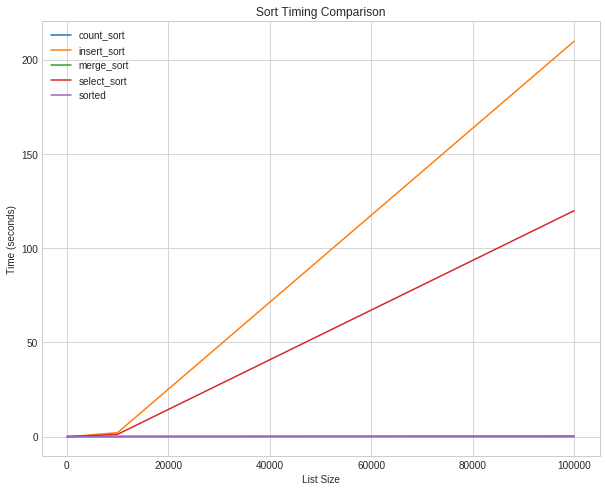

In [131]:
for sort_name, sort_timing in timing_data.groupby('sort'):
    plt.plot(sort_timing['n'], sort_timing['time'], label=sort_name)

plt.xlabel("List Size")
plt.ylabel("Time (seconds)")
plt.title("Sort Timing Comparison")
plt.legend()    
plt.show()

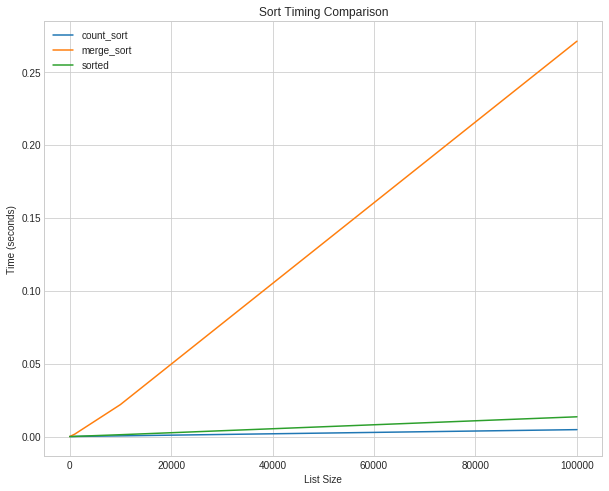

In [132]:
for sort_name, sort_timing in timing_data.groupby('sort'):
    if sort_name in ['insert_sort', 'select_sort']:
        continue
    plt.plot(sort_timing['n'], sort_timing['time'], label=sort_name)

plt.xlabel("List Size")
plt.ylabel("Time (seconds)")
plt.title("Sort Timing Comparison")
plt.legend()    
plt.show()

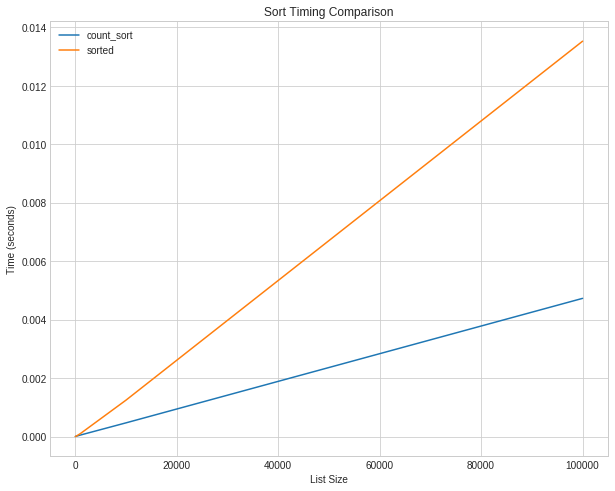

In [133]:
for sort_name, sort_timing in timing_data.groupby('sort'):
    if sort_name in ['insert_sort', 'select_sort', 'merge_sort']:
        continue
    plt.plot(sort_timing['n'], sort_timing['time'], label=sort_name)

plt.xlabel("List Size")
plt.ylabel("Time (seconds)")
plt.title("Sort Timing Comparison")
plt.legend()    
plt.show()

# Implementation Tips

**General**
* Print things frequently, so you can see what's happening to your list!
* Test your code out piece by piece, not all at once at the end

**Insert**
* It may be easier, when figuring out where to insert a card, to keep swapping it left until the card to its left is smaller than it (rather than finding the right index with no swapping, then moving all the other cards over at once to make room for it; this can be done too, though, with list slicing in Python)

**Count**
* Just don't try radix today unless you know what you're doing

# Conclusion
* Say a little bit here to encourage them to pursue computer science / programming if they have an interest: make it clear how much they can do even on their own.
* Also, please take some snacks

# Bonus Material

## Asymptotic Runtime

If any of the students seem mathematically inclined or want more technical details about how we know one sort is more efficient than another, you could discuss this with them briefly during the hands-on portion if nobody needs help at some point.